# Data Analysis and Visulisation - Project

### Submitted By - 
Bhavyaa Garg

College Roll No. : 8166

University Roll No. : 19025570012

B.Sc. (H) Computer Science, Sem V

Hansraj College,DU

## (a) Dataset Description

The dataset on which this project is based is "Googleplaystore.csv", which consists of various details like rating, installs, reviews etc. for around 10K android apps.This dataset is formed by the creator in order to help analyse the android app market. The dataset was last updated in August 2018

### Download link
https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from matplotlib import rcParams

In [2]:
apps_df=pd.read_csv("googleplaystore.csv")   
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
apps_df.shape

(10841, 13)

In [4]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps_df.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [6]:
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## (b) Data Cleaning

## (i) Detecting Outlier

In [7]:
apps_df[apps_df['Rating']>5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Detected an outlier in the dataset where 'Rating' is greater than 5.0. So, dropping that row

In [8]:
apps_df.drop([10472],inplace=True)

## (ii) Changing datatype of columns

### 1. Changing datatype of 'Reviews' from object to int

In [9]:
apps_df['Reviews']=apps_df['Reviews'].astype(int)

### 2. Removing unnecessary symbols and changing datatype of 'Installs' from object to int

In [10]:
apps_df['Installs']=apps_df['Installs'].replace({'\,' : '', '\+' : ''},regex = True).astype(int)

### 3. Changing the column "Last updated" to datetime object

In [11]:
apps_df['Last Updated']=pd.to_datetime(apps_df['Last Updated'])

#### Dataset info after changing datatypes : 

In [12]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 1.1+ MB


## (iii) Manipulating values and dropping unnecessary columns

### Changing all 0 values in 'Price' to value 'Free' and dropping the 'Type' column which is not required

In [13]:
apps_df['Price'].replace(to_replace='0',value='Free',inplace=True)

In [14]:
apps_df.drop(['Type'],axis=1,inplace=True)

In [15]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### So, values in 'Price' column have successfully changed and column 'Type' has been dropped

## (iv) Removing Duplicate values

#### Checking for duplicate values according to column 'App'

In [16]:
apps_df[apps_df.duplicated(subset='App')].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,$16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,100000,Free,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,10000000,Free,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,10000000,Free,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,10000000,Free,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device


#### Found 1181 duplicate rows. So, dropping the duplicate rows and keeping only the first row with unique 'App' value

In [17]:
apps_df.drop_duplicates(['App'],inplace=True)

In [18]:
apps_df[apps_df.duplicated(subset='App')].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
apps_df.shape

(9659, 12)

#### The number of rows reduced to 9659 after removing 1181 duplicate rows

## (v) Handling missing data

In [20]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### 1. Filling the missing 'Rating' values with the median of the column.

In [21]:
medianr=apps_df['Rating'].median()
medianr

4.3

In [22]:
apps_df['Rating']=apps_df['Rating'].fillna(medianr)

In [23]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### 2. Filling the missing values in 'Current Ver' and 'Android Ver' with the mode of the columns

In [24]:
modecv=apps_df['Current Ver'].mode().values[0]
modecv

'Varies with device'

In [25]:
modeav=apps_df['Android Ver'].mode().values[0]
modeav

'4.1 and up'

In [26]:
apps_df['Current Ver']=apps_df['Current Ver'].fillna(modecv)
apps_df['Android Ver']=apps_df['Android Ver'].fillna(modeav)

In [27]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### All missing values have been handled

### Final info and description of the dataset after data cleaning : 

In [28]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int32         
 4   Size            9659 non-null   object        
 5   Installs        9659 non-null   int32         
 6   Price           9659 non-null   object        
 7   Content Rating  9659 non-null   object        
 8   Genres          9659 non-null   object        
 9   Last Updated    9659 non-null   datetime64[ns]
 10  Current Ver     9659 non-null   object        
 11  Android Ver     9659 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(8)
memory usage: 905.5+ KB


In [29]:
apps_df.describe()

,Rating,Reviews,Installs
count,9659.000000,9.659000e+03,9.659000e+03
mean,4.192442,2.165926e+05,7.777507e+06
std,0.496397,1.831320e+06,5.375828e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,2.500000e+01,1.000000e+03
50%,4.300000,9.670000e+02,1.000000e+05
75%,4.500000,2.940100e+04,1.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


In [30]:
apps_df.describe(include=object)

,App,Category,Size,Price,Content Rating,Genres,Current Ver,Android Ver
count,9659,9659,9659,9659,9659,9659,9659,9659
unique,9659,33,461,92,6,118,2769,33
top,Color by Disney,FAMILY,Varies with device,Free,Everyone,Tools,Varies with device,4.1 and up
freq,1,1832,1227,8903,7903,826,1063,2204


### Recording the new cleaned dataset in a new file :

In [31]:
apps_df.to_csv('Googleplaystore_cleaned.csv')

## (c) EDA Queries

### (i) Query 1 :
### Recommend top apps according to the conditions : Rating >= 4.5 , Installs >= 100,000,000 , Reviews >= 2,500,000

In [33]:
apps_df.loc[(apps_df['Rating']>=4.5) & (apps_df['Installs']>=100000000) & (apps_df['Reviews']>=2500000)]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,100000000,Free,Everyone,Communication,2018-07-19,Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,500000000,Free,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up
449,"Truecaller: Caller ID, SMS spam blocking & Dialer",COMMUNICATION,4.5,7820209,Varies with device,100000000,Free,Everyone,Communication,2018-08-01,Varies with device,Varies with device
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,100000000,Free,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,PERSONALIZATION,4.5,7464996,Varies with device,100000000,Free,Everyone,Personalization,2018-08-03,Varies with device,Varies with device
5695,AVG AntiVirus 2018 for Android Security,TOOLS,4.5,6207063,Varies with device,100000000,Free,Everyone,Tools,2018-08-03,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,Everyone,Tools,2018-08-04,4.6.6,Varies with device
7550,Battery Doctor-Battery Life Saver & Battery Co...,TOOLS,4.5,8190074,17M,100000000,Free,Everyone,Tools,2018-06-01,6.24,4.0 and up


#### So, these 73 apps are the recommended popular apps according to their rating, installs and reviews.

### (ii) Query 2 :
### Find all the 'Google' apps and construct bar graph for the number of reviews. Also construct a scatter plot for their rating and installs to see if they are related

In [35]:
Google_apps=apps_df[apps_df['App'].str.contains('Google')]
Google_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
198,Google Primer,BUSINESS,4.4,62272,18M,10000000,Free,Everyone,Business,2018-06-26,3.550.2,4.1 and up
238,Google Ads,BUSINESS,4.3,29313,20M,5000000,Free,Everyone,Business,2018-07-30,1.12.0,4.0.3 and up
249,Google Analytics,BUSINESS,4.5,78662,22M,1000000,Free,Everyone,Business,2018-02-13,3.7.5,4.4 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,Everyone,Communication,2018-08-01,Varies with device,Varies with device
359,Google Voice,COMMUNICATION,4.2,171031,Varies with device,10000000,Free,Everyone,Communication,2018-08-03,Varies with device,Varies with device
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,500000000,Free,Everyone,Communication,2018-07-31,37.1.206017801.DR37_RC14,4.4 and up
401,Google Allo,COMMUNICATION,4.3,346982,Varies with device,10000000,Free,Everyone,Communication,2018-01-23,Varies with device,4.1 and up
432,PHONE for Google Voice & GTalk,COMMUNICATION,4.3,72065,13M,1000000,Free,Everyone,Communication,2018-04-18,3.0.7,4.0 and up


In [36]:
Google_apps.shape

(48, 12)

#### So, in total we found 48 apps from Google

<AxesSubplot:xlabel='Rating', ylabel='Installs'>

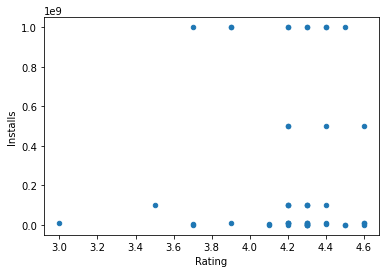

In [37]:
Google_apps.plot.scatter(x='Rating',y='Installs')

#### As we can see from the scatter plot, there is relation between the rating and installs for Google apps. The data is quite scattered.

Text(0.5, 1.0, 'Google Apps with most number of Reviews')

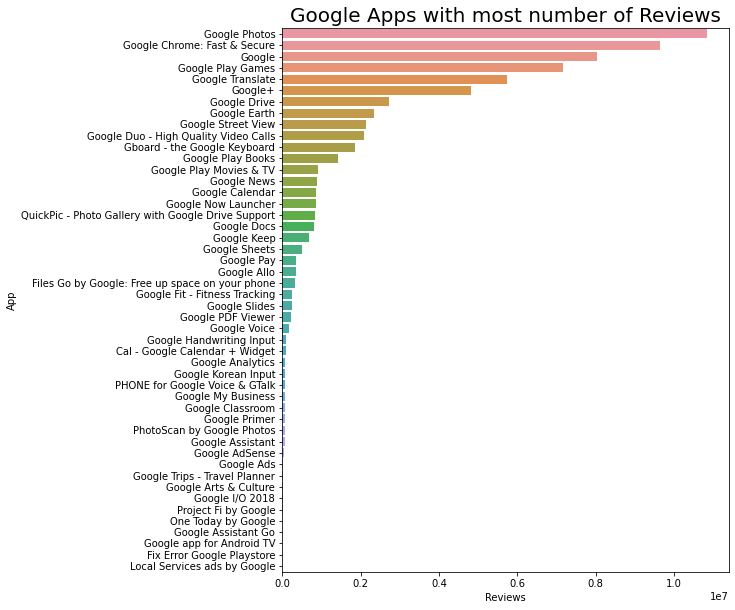

In [38]:
rcParams['figure.figsize']=8,10
sortga=Google_apps.sort_values(by=['Reviews'],ascending=0)
ax=sns.barplot(x='Reviews',y='App',data=sortga)
ax.set_xlabel('Reviews')
ax.set_ylabel('App')
ax.set_title("Google Apps with most number of Reviews",size=20)

#### From this graph we could see that 'Google Photos' has most number of reviews for Google apps, and can be considered as most popular Google app if we consider number of reviews as the condition

### (iii) Query 3 :
### For each 'Category', find the app with maximum 'Installs' and 'Rating'

In [40]:
sortbycir=apps_df.sort_values(by=['Category','Installs','Rating'],ascending=False)
topappbycat=sortbycir.drop_duplicates('Category').sort_values(by='Category')
topappbycat

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
8289,AutoScout24 - used car finder,AUTO_AND_VEHICLES,4.4,186648,42M,10000000,Free,Everyone,Auto & Vehicles,2018-08-02,9.3.52,4.2 and up
117,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715,Varies with device,10000000,Free,Everyone,Beauty,2017-08-03,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35M,100000000,Free,Everyone,Business,2018-08-02,9.7.14188,4.1 and up
297,LINE WEBTOON - Free Comics,COMICS,4.5,1013635,Varies with device,10000000,Free,Teen,Comics,2018-07-31,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,Everyone,Communication,2018-08-03,Varies with device,Varies with device
502,Find Real Love — YouLove Premium Dating,DATING,4.5,212626,11M,10000000,Free,Mature 17+,Dating,2018-07-31,4.17.2,4.1 and up
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,100000000,Free,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,Teen,Entertainment,2018-07-16,Varies with device,Varies with device


#### So, these are the top app for each category by most number of installs and rating

Text(0.5, 1.0, 'Top Category by number of installs and rating of top app')

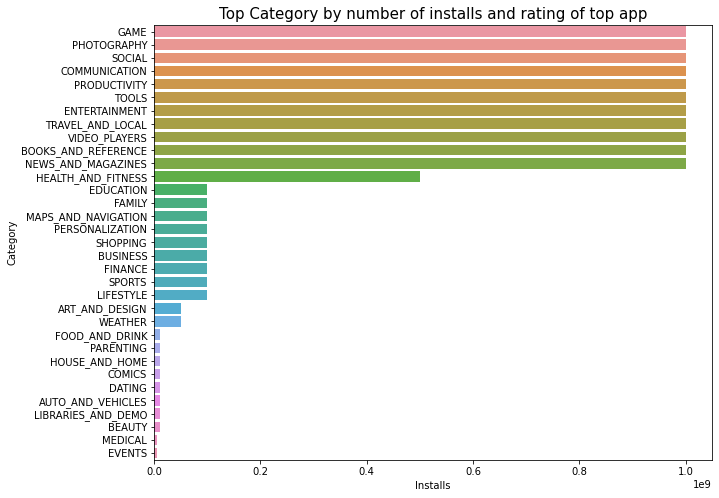

In [41]:
topappbycat.sort_values(by=['Installs','Rating'],ascending=False,inplace=True)
rcParams['figure.figsize']=10,8
ax=sns.barplot(x='Installs',y='Category',data=topappbycat)
ax.set_xlabel('Installs')
ax.set_ylabel('Category')
ax.set_title("Top Category by number of installs and rating of top app",size=15)

#### From the graph we could see that 'Photography', 'Social' and 'Game' are the top three categories if seeing the rating and number of installs of the top app in that category

### (iv) Query 4 :
### Get the top 3 paid and free games, by number of installs and rating

In [42]:
paid_games=apps_df[(apps_df['Category']=='GAME') & (apps_df['Price']!='Free')]

In [43]:
paid_games.sort_values(by=['Installs','Rating'],ascending=False)[:3]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,$0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up
5631,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000,$2.99,Teen,Action,2014-12-02,1.85,2.3 and up
8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,$4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up


#### So, top 3 paid games are "Hitman Sniper", "Five Nights and Freddy's" and "DraStic DS Emulator"

In [44]:
free_games=apps_df[(apps_df['Category']=='GAME') & (apps_df['Price']=='Free')]

In [45]:
free_games.sort_values(by=['Installs','Rating'],ascending=False)[:3]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,500000000,Free,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up


#### So, top 3 free games are "Subway Surfers", "My Talking Tom" and "Candy Crush Saga"

### (v) Query 5 :
### Make pie charts showing the percentage of apps for diiferent 'Category' and 'Content Rating' labels

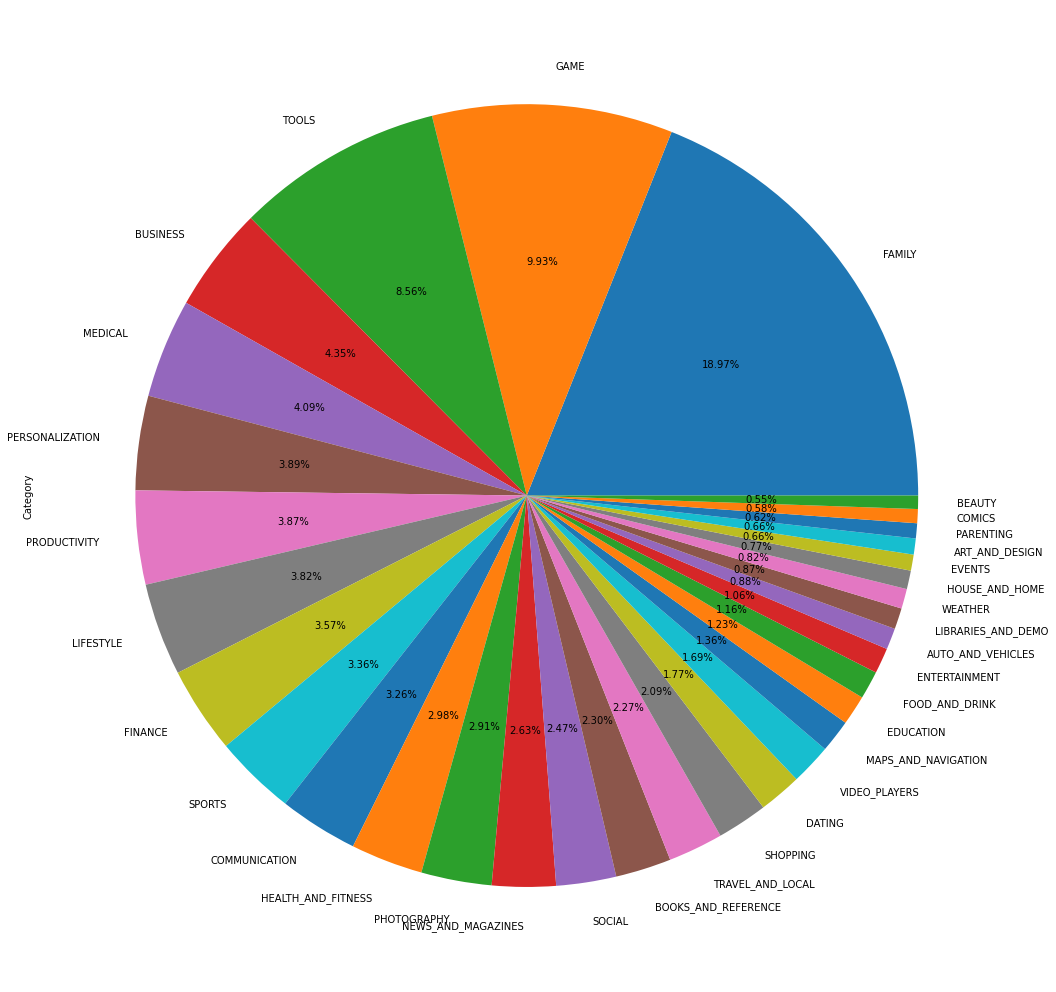

In [46]:
plt.figure(figsize=(18,18))
apps_df['Category'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

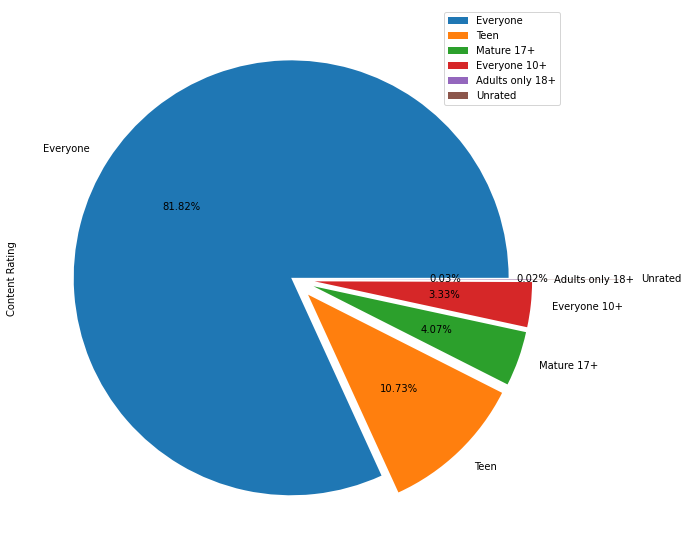

In [47]:
plt.figure(figsize=(10,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
apps_df['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f%%",explode=explode)
plt.legend()
plt.show()

#### So, there are maximum apps in 'FAMILY' category and least in 'BEAUTY'
#### And there are maximum apps with 'Everyone' content rating and least 'Unrated' apps

### (vi) Query 6 :
### Find out all the apps last updated in or before 2014, and installs less than or equal to 100

In [48]:
obsolete=apps_df.loc[(apps_df['Last Updated']<='2014-12-31') & (apps_df['Installs']<=100)]
obsolete

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4166,G-Force Driving Assistant,SPORTS,4.6,10,6.1M,100,$3.88,Everyone,Sports,2013-04-10,1,2.3.3 and up
4973,Ad Removal: thereisonlywe,PRODUCTIVITY,3.4,16,293k,100,$6.49,Everyone,Productivity,2014-05-03,1,2.2 and up
5051,AF-STROKE,MEDICAL,4.3,5,902k,100,$5.00,Teen,Medical,2013-12-19,1.3,2.1 and up
5144,AH Alarm Panel,TOOLS,3.9,7,81k,100,$4.99,Everyone,Tools,2011-05-12,1.2.0,1.5 and up
5475,500 AP World History Questions,FAMILY,4.7,7,1.2M,100,$9.99,Everyone,Education,2013-11-01,1.2,1.6 and up
5482,meStudying: AP English Lit,FAMILY,5.0,1,655k,10,$4.99,Everyone,Education,2013-08-31,1.3,2.0.1 and up
5792,Katalogen.ax,COMMUNICATION,4.3,1,172k,100,Free,Everyone,Communication,2014-10-02,1.0.0,2.2 and up
5832,¡Ay Caramba!,FAMILY,4.3,0,549k,1,$1.99,Everyone,Education,2014-06-13,1.2,3.0 and up
5961,Ice Crush 10.000 B.C.,FAMILY,4.4,31,4.2M,100,$0.99,Everyone,Casual,2013-08-15,1.48,2.0 and up
5977,Car Driving Theory Test BC,FAMILY,4.3,0,2.2M,10,$1.49,Everyone,Education,2012-04-09,1,2.1 and up


In [49]:
obsolete.shape

(51, 12)

#### So found these 51 apps last updated in or before 2014 and installs less than 100. These apps can be considered as obsolete apps, and the creator of the app can be asked to update the app to increase the functionality and thus number of installs of the app

### (vii) Query 7 :
### Get all apps with rating less than or equal to 3, and number of installs greater than or equal to 500,000

In [52]:
rating3=apps_df[(apps_df['Rating']<=3) & (apps_df['Installs']>=500000)]
rating3

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19M,500000,Free,Mature 17+,Dating,2018-07-31,4.8.5,4.0.3 and up
1576,Telstra,LIFESTYLE,3.0,4260,6.3M,5000000,Free,Everyone,Lifestyle,2017-08-08,6.1,2.3.3 and up
2317,Anthem Anywhere,MEDICAL,2.7,2657,24M,500000,Free,Everyone,Medical,2018-07-27,8.0.226,4.4 and up
3139,VZ Navigator for Galaxy S4,TRAVEL_AND_LOCAL,3.0,2750,39M,5000000,Free,Everyone,Travel & Local,2018-01-22,10.7.8.111,4.2 and up
3268,Google app for Android TV,TOOLS,3.0,66,Varies with device,10000000,Free,Everyone,Tools,2018-07-19,Varies with device,Varies with device
4194,H Band 2.0,HEALTH_AND_FITNESS,2.9,4031,8.9M,500000,Free,Everyone,Health & Fitness,2018-06-15,3.0.2,4.4 and up
4226,How Old am I?,FAMILY,2.8,4635,3.9M,1000000,Free,Everyone,Entertainment,2018-01-01,1.7,4.0 and up
4230,How Do I Look,PHOTOGRAPHY,2.7,3032,2.8M,500000,Free,Everyone,Photography,2017-12-08,1.3,3.0 and up
4493,Fossil Q,LIFESTYLE,2.9,6627,18M,500000,Free,Everyone,Lifestyle,2018-08-01,2.5.1,4.4 and up
4599,DIRECTV Remote App,FAMILY,3.0,480,19M,1000000,Free,Everyone,Entertainment,2017-08-31,2.4,6.0 and up


In [53]:
rating3.shape

(26, 12)

#### These 26 apps with high number of installs but low rating should be looked into more by the creators. The number of installs shows a potential for the success of the app, but the low rating indicates some errors or lack of functionality in the app which can be improved on

### (viii) Query 8 :
### Find out all the paid apps with rating greater than or equal to 4.5, and installs greater than or equal to 1 million

In [54]:
paidapps=apps_df[(apps_df['Installs']>=1000000) & (apps_df['Price']!='Free') & (apps_df['Rating']>=4.5)]
paidapps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,$6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,$0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up
4260,Cut the Rope GOLD,FAMILY,4.6,61264,43M,1000000,$0.99,Everyone,Puzzle,2018-06-19,3.7.0,4.1 and up
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000,$5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up
5631,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000,$2.99,Teen,Action,2014-12-02,1.85,2.3 and up
7355,Threema,COMMUNICATION,4.5,51110,Varies with device,1000000,$2.99,Everyone,Communication,2018-08-03,Varies with device,Varies with device
8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,$4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up
8860,Bloons TD 5,FAMILY,4.6,190086,94M,1000000,$2.99,Everyone,Strategy,2018-07-13,3.16,2.3.3 and up
9151,Lost Journey (Dreamsky),GAME,4.5,32344,29M,1000000,$0.99,Everyone,Adventure,2016-10-21,1.3.12,3.0 and up
9678,Where's My Water?,FAMILY,4.7,188740,69M,1000000,$1.99,Everyone,Puzzle;Brain Games,2018-07-05,1.16.0,4.2 and up


In [55]:
paidapps.shape

(11, 12)

#### These 11 apps have high number of installs and rating despite being paid. Maximum of them being family and game apps show that people are willing to pay for games if it is worth

### (ix) Query 9 :
### Get all the communication apps for everyone with number of installs greater than or equal to 100 million

In [56]:
commapps=apps_df[(apps_df['Category']=="COMMUNICATION") & (apps_df['Content Rating']=="Everyone") & (apps_df["Installs"]>=100000000)]
commapps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,Everyone,Communication,2018-08-01,Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,Varies with device,100000000,Free,Everyone,Communication,2018-07-25,37.0.0.7.163,2.3 and up
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,Everyone,Communication,2018-07-21,Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,500000000,Free,Everyone,Communication,2018-07-18,Varies with device,Varies with device
344,Firefox Browser fast & private,COMMUNICATION,4.4,3075028,Varies with device,100000000,Free,Everyone,Communication,2018-07-10,Varies with device,Varies with device
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16M,100000000,Free,Everyone,Communication,2018-07-18,5.29.3,4.4 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11M,100000000,Free,Everyone,Communication,2018-06-07,9.8.000000010492,4.0 and up


In [57]:
commapps.shape

(22, 12)

#### Online Communication being a major need of us in today's time, these 22 apps seems to lead this market ahead, making our everyday life better.  

### (x) Query 10 :
#### Get the 10 most popular apps of all time, regardless of their category

In [58]:
apps_df.sort_values(by=['Installs','Rating'],ascending=False)[:10]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,Teen,Social,2018-07-31,Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,Everyone,Photography,2018-08-06,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,Everyone,Tools,2018-08-03,Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,Everyone,Communication,2018-08-02,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device


#### So these 10 apps are the most popular apps of all time on Google play store by number of Installs and Rating

### (xi) Query 11 :
### Get the top 3 category of apps with most number of apps with rating greater than or equal to 4.5 and top 3 category of apps with most number of apps with installs greater than or equal to 100 million

In [59]:
ratinghigh=apps_df.loc[apps_df['Rating']>=4.5]
topapps=ratinghigh.groupby('Category').count()
topapps[['App']].sort_values(by=['App'],ascending=False)[:3]

,App
Category,
FAMILY,500
GAME,281
TOOLS,169


#### So, most apps with high rating of greater than or equal to 4.5 belong to 'FAMILY', 'GAME' and 'TOOLS' category

In [60]:
ratinghigh=apps_df.loc[apps_df['Installs']>=100000000]
topapps=ratinghigh.groupby('Category').count()
topapps[['App']].sort_values(by=['App'],ascending=False)[:3]

,App
Category,
GAME,62
TOOLS,28
COMMUNICATION,27


#### So, most apps with high number of installs of greater than or equal to 100 million belongs to 'GAME', 'TOOLS' and 'COMMUNICATION' categories

### (xii) Query 12 :
### Find all apps with creativity in it's genre, and group by their category

In [61]:
creativity=apps_df[apps_df['Genres'].str.contains('Creativity')]
creativity=creativity.set_index(['Category','App'])
creativity.sort_index(level=0)

Rating  \
Category       App                                                          
ART_AND_DESIGN Colorfit - Drawing & Coloring                          4.7   
               Kids Paint Free - Drawing Fun                          4.7   
               Paint Splash!                                          3.8   
               Pixel Draw - Number Art Coloring Book                  4.3   
               UNICORN - Color By Number & Pixel Art Coloring         4.7   
COMICS         Unicorn Pokez - Color By Number                        4.8   
EDUCATION      Cars Coloring Pages                                    4.4   
               Mermaids                                               4.2   
               Princess Coloring Book                                 4.5   
ENTERTAINMENT  Adult Glitter Color by Number Book - Sandbox Pages     4.3   
FAMILY         Barbie Magical Fashion                                 4.0   
               Beauty and the Beast                                   4.4   
               Color By Number - Sandbox Pixel Coloring Book          4.7   
               Coloring & Learn                                       4.4   
               Cutie Cubies                                           4.4   
               Dolphin and fish coloring book                         3.9   
               Dr. Panda Art Class                                    4.2   
               Draw Color by Number - Sandbox Pixel Art               4.7   
               Fairy Kingdom: World of Magic and Farming              4.4   
               Hello Kitty Lunchbox                                   4.2   
               Messenger Kids – Safer Messaging and Video Chat        4.2   
               No.Color – Color by Number                             4.4   
               No.Diamond – Colors by Number                          4.6   
               Pet Beauty Salon                                       3.8   
               Pinkalicious Party                                     3.0   
               Princess Adventures Puzzles                            4.4   
               Princess Palace: Royal Pony                            4.4   
               Sandbox - Color by Number Coloring Pages               4.7   
               Toca Builders                                          4.2   
               Toca Mystery House                                     4.2   
               Video Editor                                           4.1   
               Wuwu & Co.                                             4.3   
GAME           Barbie™ Fashion Closet                                 4.1   

                                                                   Reviews  \
Category       App                                                           
ART_AND_DESIGN Colorfit - Drawing & Coloring                         20260   
               Kids Paint Free - Drawing Fun                           121   
               Paint Splash!                                          2206   
               Pixel Draw - Number Art Coloring Book                   967   
               UNICORN - Color By Number & Pixel Art Coloring         8145   
COMICS         Unicorn Pokez - Color By Number                         516   
EDUCATION      Cars Coloring Pages                                    1090   
               Mermaids                                              14286   
               Princess Coloring Book                                 9770   
ENTERTAINMENT  Adult Glitter Color by Number Book - Sandbox Pages     8918   
FAMILY         Barbie Magical Fashion                               328619   
               Beauty and the Beast                                  70883   
               Color By Number - Sandbox Pixel Coloring Book         24557   
               Coloring & Learn                                      12753   
               Cutie Cubies                                           6356   
               Dolphin and fish coloring book

#### From the grouped table we can see most apps with 'Creativity' genre are in 'FAMILY' category

### (xiii) Query 13 :
### Get all the apps with android ver "5.0 and up", rating greater than 4.5 and installs greater than 10 million

In [62]:
apps_df[(apps_df['Android Ver']=="5.0 and up") & (apps_df['Rating']>=4.5) & (apps_df['Installs']>=10000000)]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1077,Capital One® Mobile,FINANCE,4.6,510392,79M,10000000,Free,Everyone,Finance,2018-08-01,5.38.1,5.0 and up
1173,Chase Mobile,FINANCE,4.6,1374549,32M,10000000,Free,Everyone,Finance,2018-07-23,3.52,5.0 and up
1296,8fit Workouts & Meal Planner,HEALTH_AND_FITNESS,4.6,115721,67M,10000000,Free,Everyone,Health & Fitness,2018-07-11,3.5.0,5.0 and up
1311,Freeletics: Personal Trainer & Fitness Workouts,HEALTH_AND_FITNESS,4.5,130104,25M,10000000,Free,Everyone,Health & Fitness,2018-08-03,5.3,5.0 and up
1312,Nike Training Club - Workouts & Fitness Plans,HEALTH_AND_FITNESS,4.6,251534,93M,10000000,Free,Everyone,Health & Fitness,2018-07-18,5.14.0,5.0 and up
1802,Partymasters - Fun Idle Game,GAME,4.6,541144,63M,10000000,Free,Teen,Arcade,2018-07-12,1.2.5,5.0 and up
1919,Crossy Road,GAME,4.5,4230886,60M,100000000,Free,Everyone,Action,2018-08-01,3.1.0,5.0 and up
3257,Files Go by Google: Free up space on your phone,TOOLS,4.6,315585,8.5M,10000000,Free,Everyone,Tools,2018-07-18,1.0.204375696,5.0 and up
4038,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8,2588730,9.7M,50000000,Free,Everyone,Video Players & Editors,2018-07-30,1.7.1.3,5.0 and up
4859,Angry Birds Evolution,FAMILY,4.5,384602,88M,10000000,Free,Everyone,Role Playing,2018-07-30,1.21.1,5.0 and up


#### So these apps are the apps of higher ver with most installs and ratings

### In conclusion, android app industry plays a major part in everybody's life. Be it Entertainment, Education, Games, Business, anything, appropriate apps are always required for the same. There is always scope for numerous oppurtunities and improvement in this industry and generous attention should be paid to the same